In [1]:
import numpy as np
import math
import pandas
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, LSTM, Flatten
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
def mmean(arr):
    sr = 0
    c = 0
    for i in arr:
        sr += i
        c += 1
    return sr/c

In [3]:
def trans_to_softmax(val, shape):
    buf = [0 for i in range(shape)]
    buf[val] = 1
    return buf

In [4]:
from random import randint as randint
def randcolor(n):
    buf = [str('#' + str(randint(10,99)) + '' + str(randint(10,99)) + ''+ str(randint(10,99))) for i in range(n)]
    return buf

Создание выборки по углам

In [5]:
def create_tg_viborka(arr):
    tg_a_p = []
    for i in arr:
        buf = []
        for c in range(len(i) - 1):
            buf.append(math.atan( ( i[c] - i[len(i)-1] ) / (len(i) - 1) ) )
        tg_a_p.append(buf)
    return tg_a_p

Создание выборки для кластеризации

In [6]:
def create_viborka(start, arr):
    arr_sr_t = []
    for i in range(start, len(arr)+1):
        arr_sr_t.append(arr[i - start:i])
    return arr_sr_t

Визуализация результатов класстеризации

In [7]:
def visualize(n_clust, predictions, arr, file_name = 'ind.png', sh = False):

    colors = randcolor(n_clust)

    not_train = len(arr) - len(predictions)
    
    
    for i in range(len(predictions)):
        color = predictions[i]
        val = arr[i + not_train]
        plt.scatter(i + not_train, val, c = colors[color])
        
    plt.plot(arr)
    if(sh):
        plt.show()
    plt.savefig(file_name)
    

Чиатем файл 2018 года и составляем список температур

In [8]:
d = pandas.read_excel('2018.xlsx', engine='openpyxl')
temp = []
buf = []
c = 0
for i in d['T']:
  buf.append(i)
  c += 1
  if c == 8:
    temp.append(buf)
    buf = []
    c = 0

Список средних значений в пачке

In [9]:
def mean_arr(arr):
    sr_temp = []
    for i in arr:
        sr_temp.append(mmean(i))
    return sr_temp

In [10]:
sr_temp = mean_arr(temp)

Выборка для класстеризации, количестов кластеров, сколько элементов в пачке для выборки

In [11]:
clusters__ = 8
in_vibor__ = 6

x_train = create_viborka(in_vibor__, sr_temp)
x_tg_train = create_tg_viborka(x_train)

In [12]:
x_tg_train

[[0.7314321680809359,
  0.607362371288824,
  0.05245184523589078,
  0.07485984771076667,
  -0.17324566645236514],
 [0.8226853257311154,
  0.41031015589594444,
  0.42907339605746486,
  0.20459658756236454,
  0.3653297453805159],
 [0.4060980583176157,
  0.42493098203063717,
  0.19979824624031495,
  0.3609606476071892,
  -0.004999958333958394],
 [0.20938539295349548,
  -0.037482436691661486,
  0.13664316249108727,
  -0.24026727278093876,
  -0.23554498072086355],
 [-0.15377630011950816,
  0.019997333973150642,
  -0.34776698785701565,
  -0.3433406466650633,
  -0.11696369089802384],
 [0.4414065853903529,
  0.08975817418995002,
  0.09471574598847536,
  0.32324980364814193,
  0.42493098203063684],
 [0.02499479361892016,
  0.029991004856877973,
  0.26371183446226637,
  0.36968428879530163,
  -0.06490868969343297],
 [-0.14644406768803553,
  0.09223752844312622,
  0.20699219421982115,
  -0.23790747868800954,
  -0.1756703449764861],
 [0.7202441758045743,
  0.7828919029808601,
  0.4970668238415453,

Создание модели для класстеризации, ее обучение и прогнозировние

In [13]:
len(sr_temp)

365

In [14]:
k_mean_model = KMeans(n_clusters = clusters__)
k_mean_model.fit(x_tg_train)
predictions = k_mean_model.predict(x_tg_train)

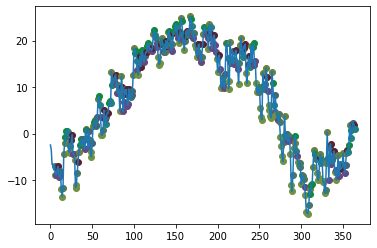

<Figure size 432x288 with 0 Axes>

In [15]:
visualize(clusters__,predictions,  sr_temp , sh = True)

Модель определяющая какой из кластеров будет после предыдущих N кластеров

Формирование обучающей выборки для модели предсказания кластера

In [16]:
size_of_vib = in_vibor__ - 1

x_train_cluster = []
y_train_cluster = []
for i in range(size_of_vib, len(predictions)):
    y_train_cluster.append(trans_to_softmax(predictions[i], clusters__))


for i in range(len(predictions) - size_of_vib):
    buf = [] 
    for j in range(i, i+size_of_vib):
        buf.append(float(predictions[j]))
    x_train_cluster.append(buf)

In [17]:
x_train_cluster

[[1.0, 2.0, 6.0, 4.0, 4.0],
 [2.0, 6.0, 4.0, 4.0, 6.0],
 [6.0, 4.0, 4.0, 6.0, 6.0],
 [4.0, 4.0, 6.0, 6.0, 5.0],
 [4.0, 6.0, 6.0, 5.0, 2.0],
 [6.0, 6.0, 5.0, 2.0, 2.0],
 [6.0, 5.0, 2.0, 2.0, 1.0],
 [5.0, 2.0, 2.0, 1.0, 3.0],
 [2.0, 2.0, 1.0, 3.0, 3.0],
 [2.0, 1.0, 3.0, 3.0, 7.0],
 [1.0, 3.0, 3.0, 7.0, 7.0],
 [3.0, 3.0, 7.0, 7.0, 7.0],
 [3.0, 7.0, 7.0, 7.0, 0.0],
 [7.0, 7.0, 7.0, 0.0, 2.0],
 [7.0, 7.0, 0.0, 2.0, 2.0],
 [7.0, 0.0, 2.0, 2.0, 1.0],
 [0.0, 2.0, 2.0, 1.0, 4.0],
 [2.0, 2.0, 1.0, 4.0, 4.0],
 [2.0, 1.0, 4.0, 4.0, 6.0],
 [1.0, 4.0, 4.0, 6.0, 6.0],
 [4.0, 4.0, 6.0, 6.0, 2.0],
 [4.0, 6.0, 6.0, 2.0, 2.0],
 [6.0, 6.0, 2.0, 2.0, 2.0],
 [6.0, 2.0, 2.0, 2.0, 1.0],
 [2.0, 2.0, 2.0, 1.0, 4.0],
 [2.0, 2.0, 1.0, 4.0, 3.0],
 [2.0, 1.0, 4.0, 3.0, 7.0],
 [1.0, 4.0, 3.0, 7.0, 7.0],
 [4.0, 3.0, 7.0, 7.0, 7.0],
 [3.0, 7.0, 7.0, 7.0, 0.0],
 [7.0, 7.0, 7.0, 0.0, 5.0],
 [7.0, 7.0, 0.0, 5.0, 5.0],
 [7.0, 0.0, 5.0, 5.0, 6.0],
 [0.0, 5.0, 5.0, 6.0, 3.0],
 [5.0, 5.0, 6.0, 3.0, 7.0],
 [5.0, 6.0, 3.0, 7.0

Модель

In [18]:
model = keras.Sequential()
model.add(Dense(input_dim = size_of_vib, units=80, activation='tanh')) 
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units = clusters__, activation='softmax'))

model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
info = model.fit(x_train_cluster, y_train_cluster, epochs = 300)

Epoch 1/300
12/12 [==============================] - 1s 1ms/step - loss: 2.1617 - accuracy: 0.1345
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 2.0108 - accuracy: 0.2046
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 2.0481 - accuracy: 0.1979
Epoch 4/300
12/12 [==============================] - 0s 1ms/step - loss: 2.0648 - accuracy: 0.1785
Epoch 5/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9921 - accuracy: 0.1846
Epoch 6/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9476 - accuracy: 0.2210
Epoch 7/300
12/12 [==============================] - 0s 907us/step - loss: 1.9323 - accuracy: 0.2156
Epoch 8/300
12/12 [==============================] - 0s 907us/step - loss: 1.8856 - accuracy: 0.2190
Epoch 9/300
12/12 [==============================] - 0s 997us/step - loss: 1.9524 - accuracy: 0.2551
Epoch 10/300
12/12 [==============================] - 0s 997us/step - loss: 1.9038 - accuracy: 0.2450
E

In [20]:
predictions

array([1, 2, 6, 4, 4, 6, 6, 5, 2, 2, 1, 3, 3, 7, 7, 7, 0, 2, 2, 1, 4, 4,
       6, 6, 2, 2, 2, 1, 4, 3, 7, 7, 7, 0, 5, 5, 6, 3, 7, 0, 6, 5, 1, 2,
       2, 5, 3, 7, 7, 0, 5, 5, 3, 7, 0, 6, 2, 2, 1, 4, 4, 0, 5, 5, 4, 7,
       7, 0, 3, 7, 0, 5, 5, 4, 6, 6, 1, 1, 2, 1, 3, 4, 6, 6, 5, 4, 4, 6,
       6, 4, 4, 0, 5, 5, 3, 3, 7, 7, 0, 6, 2, 1, 4, 4, 7, 7, 0, 6, 5, 4,
       4, 7, 7, 0, 6, 6, 6, 4, 3, 7, 0, 0, 6, 6, 2, 2, 2, 4, 3, 7, 0, 6,
       1, 4, 4, 0, 3, 7, 0, 6, 6, 1, 4, 7, 7, 7, 0, 6, 6, 2, 4, 3, 7, 0,
       6, 2, 1, 4, 4, 0, 0, 5, 3, 7, 0, 6, 6, 1, 2, 2, 2, 1, 4, 4, 6, 6,
       1, 4, 3, 7, 7, 0, 6, 6, 2, 3, 4, 0, 6, 6, 1, 4, 6, 6, 2, 2, 1, 4,
       6, 2, 2, 1, 1, 6, 5, 3, 7, 0, 2, 2, 3, 4, 0, 5, 6, 1, 5, 4, 6, 6,
       2, 1, 3, 3, 0, 0, 5, 4, 4, 2, 2, 1, 4, 4, 0, 3, 4, 7, 7, 6, 6, 2,
       2, 2, 1, 1, 2, 2, 2, 3, 7, 0, 5, 3, 4, 6, 2, 2, 2, 2, 3, 7, 0, 6,
       5, 2, 2, 6, 1, 1, 2, 2, 2, 2, 1, 3, 7, 0, 5, 6, 1, 6, 2, 2, 2, 1,
       3, 3, 7, 0, 6, 2, 2, 1, 1, 2, 1, 1, 1, 6, 2,

In [21]:
np.argmax(model.predict([[1, 3, 1, 0, 0]]))

2

Создаем для каждого кластера свою сеть для предсказания следущего значения

In [22]:
NN = []
for i in range(clusters__):
    NN.append(keras.Sequential())

In [23]:
NN

Подготовка нсетей

In [24]:
for ns in NN:
    ns.add(Dense(input_dim = size_of_vib, units = 100, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 1))
    ns.compile(loss = 'mae', optimizer = 'adam')

Формирование обучающих и тестовых выборок

In [25]:
x_last_train = [[] for i in range(clusters__)]
y_last_train = [[] for i in range(clusters__)]

In [26]:
for i in range(len(sr_temp) - in_vibor__):
    buf = sr_temp[i:i+size_of_vib]
    to_trans_buf = sr_temp[i:i+in_vibor__]
    tg_v = create_tg_viborka([to_trans_buf])
    predict_on = k_mean_model.predict(tg_v)
    pre = int(predict_on[0])
    yy = [to_trans_buf[-1]]
    

    x_last_train[pre].append(buf)
    y_last_train[pre].append(yy)


In [ ]:
for n in range(len(NN)):
    NN[n].fit(x_last_train[n], y_last_train[n], epochs = 200)

Epoch 1/200
2/2 [==============================] - 1s 3ms/step - loss: 16.5131
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 3.1223
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 6.6035
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 4.4291
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 1.5819
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 3.5280
Epoch 7/200
2/2 [==============================] - 0s 4ms/step - loss: 2.5359
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 0.7821
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 2.2431
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 1.7709
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - loss: 0.8272
Epoch 12/200
2/2 [==============================] - 0s 5ms/step - loss: 1.7415
Epoch 13/200
2/2 [==============================] - 0s 4ms/s

In [ ]:
sr_temp

In [ ]:
print(predictions)
ptest = NN[1].predict([[-2.4499999999999997,-3.4625000000000004,-6.675000000000001,-6.5625,-7.8125,]])
print(ptest)
print(sr_temp[5])

In [ ]:
print('ошибка ' + str(float((sr_temp[5] - ptest)/sr_temp[5]) * 100) + ' %')

Что бы увеличить точность нужно подгонять кол-во кластеров и дней в выборке
полет фантазии

In [ ]:
d_n = pandas.read_excel('2019.xlsx', engine='openpyxl')
temp_n = []
buf_n = []
c_n = 0
for i in d_n['T']:
  buf_n.append(i)
  c_n += 1
  if c_n == 8:
    temp_n.append(buf_n)
    buf_n = []
    c_n = 0

In [ ]:
sr_temp_n = mean_arr(temp_n)
sr_temp_n

In [ ]:
x_train_n = create_viborka(in_vibor__, sr_temp_n)
x_tg_train_n = create_tg_viborka(x_train_n)

In [ ]:
l = 0
while l < len(x_train_n):
    print(l, x_train_n[l])
    l += 1

In [ ]:
predictions_n = k_mean_model.predict(x_tg_train_n)
l = 0
while l < len(predictions_n):
    print(l, predictions_n[l])
    l += 1

In [ ]:
print(predictions_n)
ptest_n = NN[5].predict([[19.650000000000002, 16.8875, 16.775, 16.337500000000002, 15.350000000000001]])
print(ptest_n)
print(20.5)

In [ ]:
(20.5 - 18.65) / 20.5